<a href="https://colab.research.google.com/github/gilangf03/Tugas-Pertemuan4/blob/main/UTS_23423031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

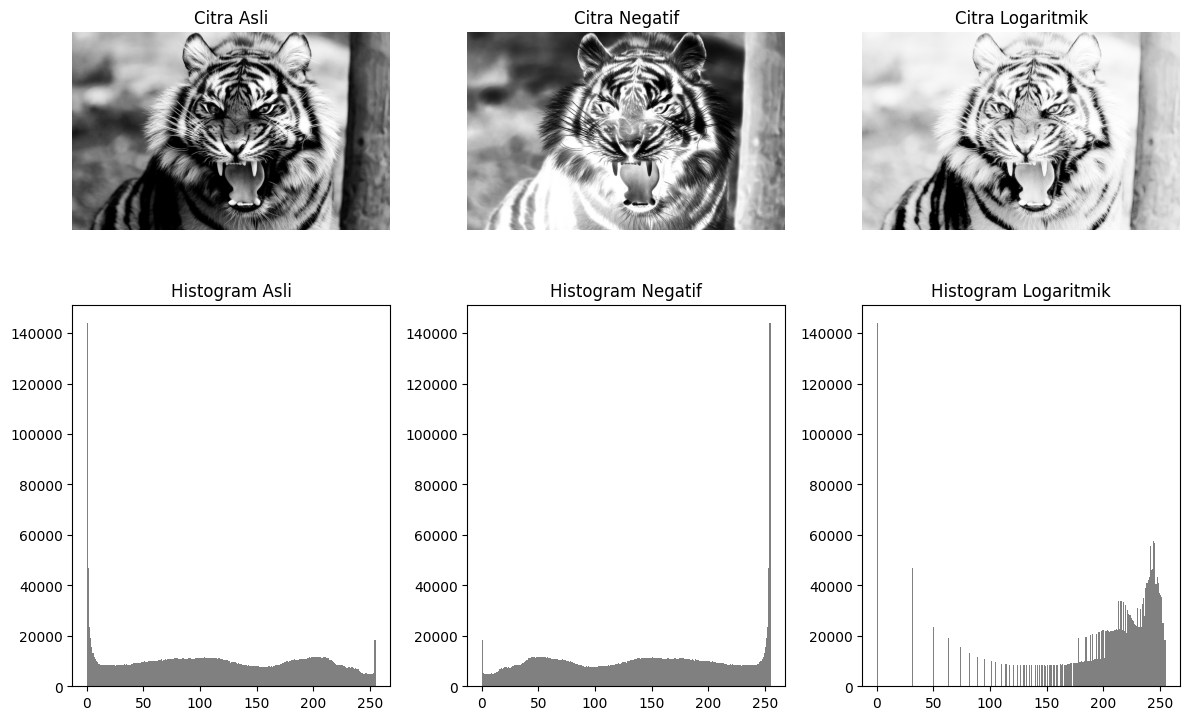

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra grayscale
img = cv2.imread('macan.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Gambar tidak ditemukan!")

# 2. Konversi ke float agar aman dari overflow
img_float = img.astype(float)

# 3. Transformasi Negatif: G = 255 - F
negatif = 255 - img

# 4. Transformasi Logaritmik: G = c * log(1 + F)
c = 255 / np.log(1 + np.max(img_float))
log_transform = c * np.log(1 + img_float)

# Normalisasi ke 0–255 dan ubah ke uint8
log_transform = np.uint8(np.clip(log_transform, 0, 255))

# 5. Tampilkan hasil
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(negatif, cmap='gray')
plt.title('Citra Negatif')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(log_transform, cmap='gray')
plt.title('Citra Logaritmik')
plt.axis('off')

plt.subplot(2,3,4)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Histogram Asli')

plt.subplot(2,3,5)
plt.hist(negatif.ravel(), bins=256, color='gray')
plt.title('Histogram Negatif')

plt.subplot(2,3,6)
plt.hist(log_transform.ravel(), bins=256, color='gray')
plt.title('Histogram Logaritmik')

plt.tight_layout()
plt.show()


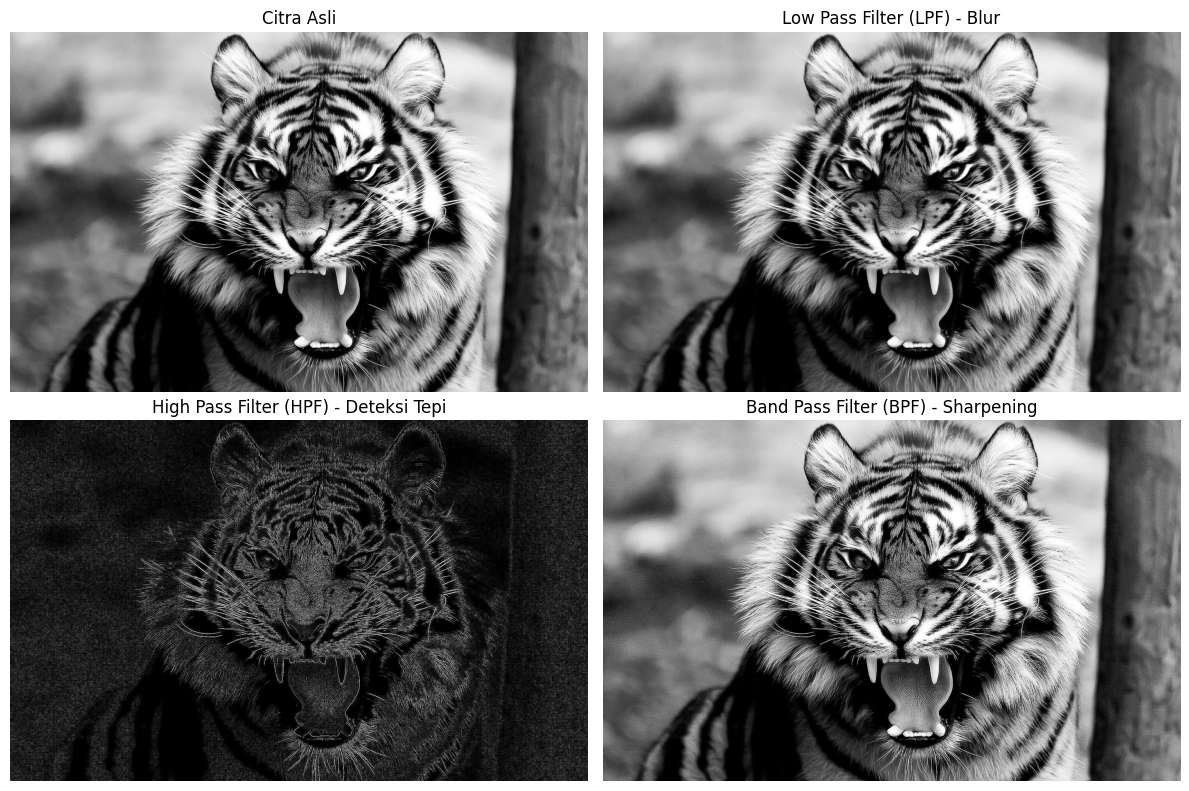

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra grayscale
img = cv2.imread('macan.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Gambar tidak ditemukan!")

# 2. Definisikan kernel filter
# Low Pass Filter (LPF) - untuk blur / reduksi noise
kernel_lpf = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# High Pass Filter (HPF) - untuk deteksi tepi
kernel_hpf = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Band Pass Filter (BPF) - untuk penajaman
kernel_bpf = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

# 3. Terapkan ketiga kernel pada citra
lpf_result = cv2.filter2D(img, -1, kernel_lpf)
hpf_result = cv2.filter2D(img, -1, kernel_hpf)
bpf_result = cv2.filter2D(img, -1, kernel_bpf)

# 4. Tampilkan hasil
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(lpf_result, cmap='gray')
plt.title('Low Pass Filter (LPF) - Blur')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(hpf_result, cmap='gray')
plt.title('High Pass Filter (HPF) - Deteksi Tepi')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(bpf_result, cmap='gray')
plt.title('Band Pass Filter (BPF) - Sharpening')
plt.axis('off')

plt.tight_layout()
plt.show()
